In [466]:
import pandas as pd
import matplotlib.pyplot as plt

In [467]:
uber= pd.read_csv("My Uber Drives.csv")
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [468]:
uber.shape

(1156, 7)

In [469]:
uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [470]:
uber.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [471]:
uber.dropna(subset=['END_DATE*'],inplace=True)
uber.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

## Filling UP NULL VALUES IN PURPOSE

In [473]:
uber['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [474]:
uber['PURPOSE*'] = uber['PURPOSE*'].ffill()

In [475]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [476]:
uber['PURPOSE*'].value_counts()

PURPOSE*
Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [477]:
uber[uber.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [478]:
uber.drop_duplicates(inplace=True)
uber[uber.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*


In [479]:
uber['START_DATE*'] = pd.to_datetime(uber['START_DATE*'],errors='coerce')
uber['END_DATE*'] = pd.to_datetime(uber['END_DATE*'],errors='coerce')

In [480]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [481]:
uber['START_DATE'] = uber['START_DATE*'].dt.date
uber['START_TIME'] = uber['START_DATE*'].dt.time
uber['END_DATE'] = uber['END_DATE*'].dt.date
uber['END_TIME'] = uber['END_DATE*'].dt.time
uber['MONTH'] = uber['START_DATE*'].dt.month
uber['YEAR'] = uber['START_DATE*'].dt.year
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016


In [482]:
uber.drop(['START_DATE*','END_DATE*'],axis=1,inplace=True)
uber.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016
1,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016


In [483]:
uber = uber[['START_DATE','START_TIME','END_DATE','END_TIME','MONTH','YEAR','CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
uber.head()

,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## TOTAL MILES TRAVELLED PER CATEGORY

In [485]:
uber.groupby('CATEGORY*').agg(total=('MILES*','sum'))

,total
CATEGORY*,
Business,11477.1
Personal,717.7


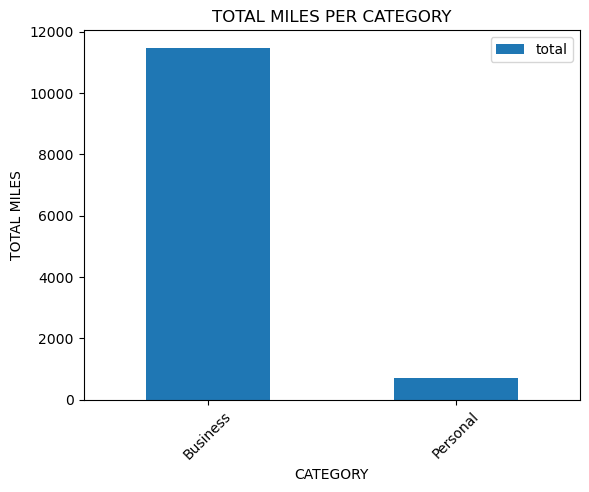

In [486]:

uber.groupby('CATEGORY*').agg(total=('MILES*','sum')).plot(kind='bar')
plt.xlabel('CATEGORY')
plt.xticks(rotation=45) 
plt.ylabel('TOTAL MILES')
plt.title("TOTAL MILES PER CATEGORY")
plt.show()

## TOP 10 PICKUP PLACES

In [488]:
uber['START*'].value_counts().head(10)

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

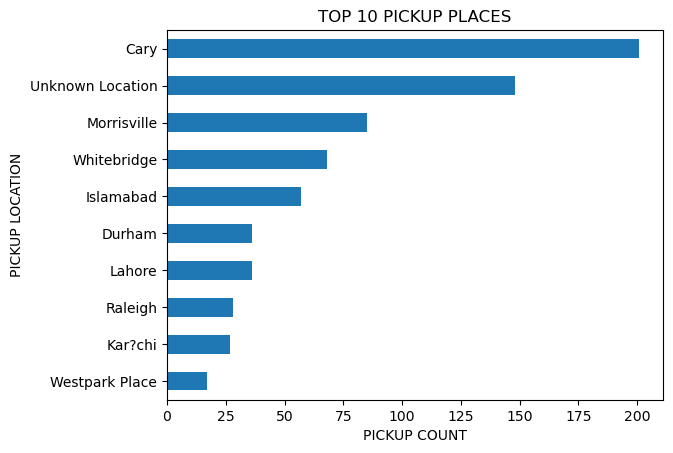

In [489]:
uber['START*'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('PICKUP COUNT')
plt.ylabel('PICKUP LOCATION')
plt.title("TOP 10 PICKUP PLACES")
plt.show()

## TOP 10 DROP PLACES

In [491]:
uber['STOP*'].value_counts().head(10)

STOP*
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

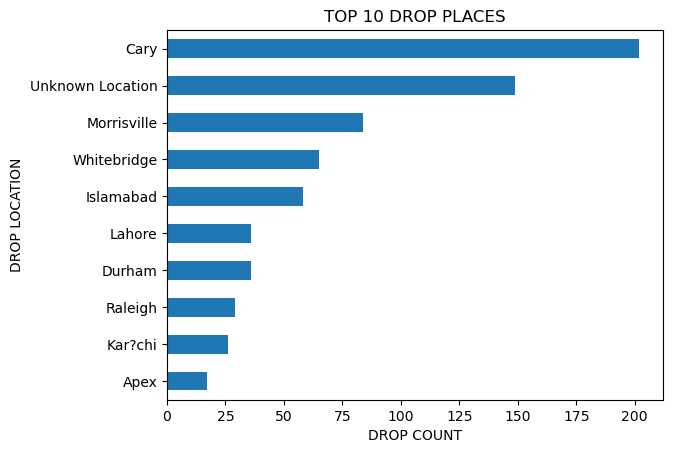

In [492]:
uber['STOP*'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('DROP COUNT')
plt.ylabel('DROP LOCATION')
plt.title("TOP 10 DROP PLACES")
plt.show()

## NUMBER OF ROUNDTRIPS

In [494]:
def rtrip_check(x):
    if x['START*']==x['STOP*']:
        return 'YES'
    else:
        return 'NO'

In [495]:
#uber['RTRIP']=uber.apply(rtrip_check, axis=1)

#ANOTHER WAY
#uber['RTRIP']=uber.apply(lambda x: 'YES' if x['START*']==x['STOP*'] else 'NO', axis=1) 
uber.loc[:, 'RTRIP'] = uber.apply(rtrip_check, axis=1)


In [496]:
uber.head()

,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,RTRIP
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO


Text(0.5, 0, 'ROUND TRIPS')

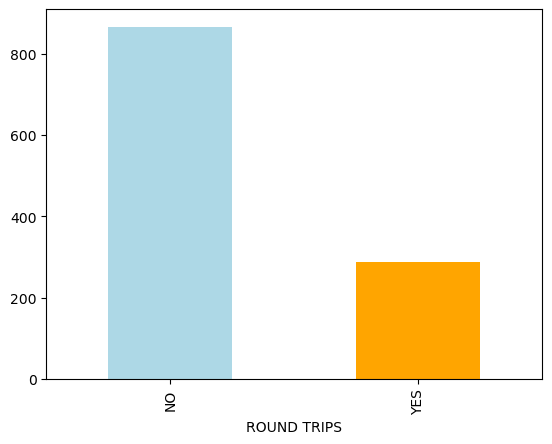

In [497]:
uber['RTRIP'].value_counts().plot(kind='bar',color=['lightblue', 'orange'])
plt.xlabel('ROUND TRIPS')

## FURTHER CLEANING AND PREPROCESSING

In [498]:
uber['MONTH']= uber['MONTH'].fillna(uber['MONTH'].mode()[0])
uber['MONTH'] = uber['MONTH'].astype(int)


In [499]:
uber.head()

,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,RTRIP
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO


In [500]:
uber['YEAR'] = uber['YEAR'].fillna(uber['YEAR'].mode()[0])
uber['YEAR'] = uber['YEAR'].astype('int32')
uber.head()

,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,RTRIP
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO


In [501]:
uber.dtypes

START_DATE     object
START_TIME     object
END_DATE       object
END_TIME       object
MONTH           int32
YEAR            int32
CATEGORY*      object
START*         object
STOP*          object
MILES*        float64
PURPOSE*       object
RTRIP          object
dtype: object

In [502]:
uber['START_HOUR'] = uber['START_TIME'].apply(lambda x: x.hour)
uber['START_MINUTE'] = uber['START_TIME'].apply(lambda x: x.minute)
uber['END_HOUR'] = uber['END_TIME'].apply(lambda x: x.hour)
uber['END_MINUTE'] = uber['END_TIME'].apply(lambda x: x.minute)

In [503]:
uber.head()

,START_DATE,START_TIME,END_DATE,END_TIME,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,RTRIP,START_HOUR,START_MINUTE,END_HOUR,END_MINUTE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,21,11,21,17
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES,1,25,1,37
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,20,25,20,38
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,17,31,17,45
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,14,42,15,49


In [504]:
uber = uber[['START_DATE','START_HOUR','START_MINUTE','END_DATE','END_HOUR','END_MINUTE','MONTH','YEAR','CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]

In [505]:
uber.head()

,START_DATE,START_HOUR,START_MINUTE,END_DATE,END_HOUR,END_MINUTE,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01,21,11,2016-01-01,21,17,1,2016,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,1,25,2016-01-02,1,37,1,2016,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20,25,2016-01-02,20,38,1,2016,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17,31,2016-01-05,17,45,1,2016,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14,42,2016-01-06,15,49,1,2016,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [506]:
uber['DURATION'] = uber['END_HOUR']*60 + uber['END_MINUTE'] - (uber['START_HOUR']*60 + uber['START_MINUTE'])

In [507]:
uber['DURATION']

0         6
1        12
2        13
3        14
4        67
       ... 
1150      7
1151     18
1152     35
1153     18
1154    103
Name: DURATION, Length: 1154, dtype: int64

In [553]:
# convert miles to km
uber['MILES*'] = uber['MILES*']*1.60934
#calculate speed
uber['SPEED'] = uber['MILES*']/(uber['DURATION']/60)

In [555]:
uber.head()

,START_DATE,START_HOUR,START_MINUTE,END_DATE,END_HOUR,END_MINUTE,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,SPEED
0,2016-01-01,21,11,2016-01-01,21,17,1,2016,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,6,82.076340
1,2016-01-02,1,25,2016-01-02,1,37,1,2016,Business,Fort Pierce,Fort Pierce,8.046700,Meal/Entertain,12,40.233500
2,2016-01-02,20,25,2016-01-02,20,38,1,2016,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,13,35.653071
3,2016-01-05,17,31,2016-01-05,17,45,1,2016,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,14,32.416706
4,2016-01-06,14,42,2016-01-06,15,49,1,2016,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,67,91.804440


In [557]:
uber.describe()

,START_HOUR,START_MINUTE,END_HOUR,END_MINUTE,MONTH,YEAR,MILES*,DURATION,SPEED
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.0,1154.000000,1154.000000,1154.000000
mean,14.688908,29.123917,14.787695,28.968804,6.983536,2016.0,17.006568,5.772097,inf
std,4.570667,17.198582,4.771172,17.533090,3.546334,0.0,34.743160,154.957995,NaN
min,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,0.804670,-1432.000000,-17.107984
25%,12.000000,14.000000,12.000000,14.000000,3.250000,2016.0,4.667086,10.000000,23.566308
50%,15.000000,29.000000,15.000000,29.000000,7.000000,2016.0,9.656040,16.000000,33.357229
75%,18.000000,44.000000,18.000000,44.000000,10.000000,2016.0,16.737136,27.000000,45.634543
max,23.000000,59.000000,23.000000,59.000000,12.000000,2016.0,499.378202,330.000000,inf


## DISTRIBUTION BY MONTHS

Text(0, 0.5, 'NUMBER OF RIDES')

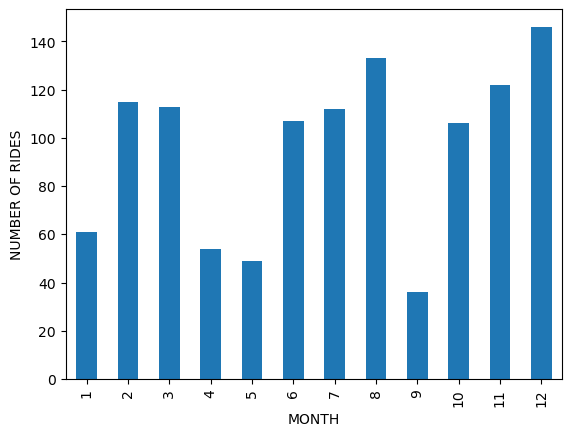

In [579]:
uber['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('NUMBER OF RIDES')

Text(0, 0.5, 'NUMBER OF RIDES')

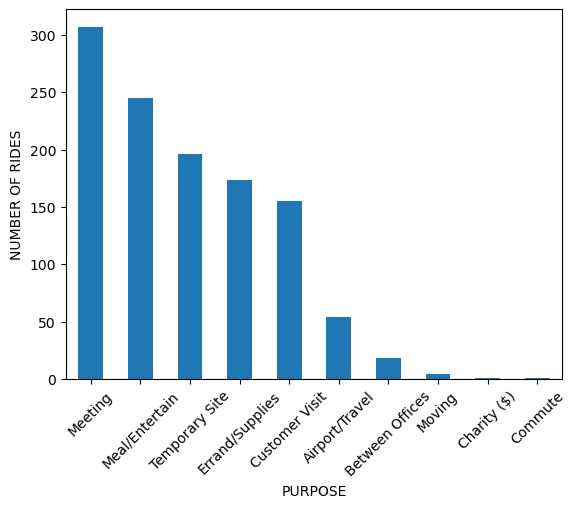

In [587]:
uber['PURPOSE*'].value_counts().plot(kind='bar')
plt.xlabel('PURPOSE')
plt.xticks(rotation=45)
plt.ylabel('NUMBER OF RIDES')

In [589]:
uber.head()

,START_DATE,START_HOUR,START_MINUTE,END_DATE,END_HOUR,END_MINUTE,MONTH,YEAR,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DURATION,SPEED
0,2016-01-01,21,11,2016-01-01,21,17,1,2016,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,6,82.076340
1,2016-01-02,1,25,2016-01-02,1,37,1,2016,Business,Fort Pierce,Fort Pierce,8.046700,Meal/Entertain,12,40.233500
2,2016-01-02,20,25,2016-01-02,20,38,1,2016,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,13,35.653071
3,2016-01-05,17,31,2016-01-05,17,45,1,2016,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,14,32.416706
4,2016-01-06,14,42,2016-01-06,15,49,1,2016,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,67,91.804440


In [591]:
uber.to_csv('Uber_cleaned.csv', index=False)